# INSTALLING AND CONNECTING

In [1]:
# Connect to Your Drive (You can donwload the content from https://mir.dei.uc.pt/downloads.html or from Kaggle: https://www.kaggle.com/datasets/imsparsh/4q-audio-emotion-dataset-russell  )
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Installing libs
!apt-get update -qq
!apt-get install -y libav-tools
!pip install essentia
!pip install matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package libav-tools is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'libav-tools' has no installation candidate
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 62.9 MB/s eta 0:00:00


# DATABASE     4Q Emotional



In [3]:
from zipfile import ZipFile
import os
import pandas as pd

# 4Q audio emotion dataset (Russell's model) (2018)
# Specify the path to your zip file
zip_file_path = "/content/drive/MyDrive/Semantic Music Generation/MER_audio_taffc_dataset.zip"

# Specify the directory where you want to extract the contents
extracted_folder_path = "/content"

# Create a ZipFile object
with ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of zip file in the specified directory
    zip_ref.extractall(extracted_folder_path)

# List the files in the extracted folder
extracted_files = os.listdir(extracted_folder_path)

# Specify the path to the CSV file
annotations_file_path = "/content/panda_dataset_taffc_annotations.csv"
# Read the CSV file into a pandas DataFrame
annotations_df = pd.read_csv(annotations_file_path)

# Specify the path to the CSV file
metadata_file_path = "/content/panda_dataset_taffc_metadata.csv"
# Read the CSV file into a pandas DataFrame
metadata_df = pd.read_csv(metadata_file_path)

# Display the first few rows of the DataFrame
print(metadata_df.head(5))

           Song                       Artist                            Title  \
0  MT0000004637                Charlie Poole  Bulldog Down in Sunny Tennessee   
1  MT0000011357                    Dismember              Reborn in Blasphemy   
2  MT0000011975  Curse of the Golden Vampire              Ultrasonic Meltdown   
3  MT0000040632                  Gipsy Kings             Flamencos en el Aire   
4  MT0000044741                Little Walter                       Last Night   

  Quadrant     PQuad  MoodsTotal  Moods  \
0       Q3  0.666667           3      3   
1       Q2  0.666667           3      3   
2       Q2  0.666667           6      5   
3       Q1  0.750000           4      3   
4       Q3  0.750000           4      4   

                                  MoodsFoundStr  \
0                       circular; greasy; messy   
1                    jittery; negative; nervous   
2  fierce; harsh; hostile; menacing; outrageous   
3                            fiery; sexy; spicy   

In [4]:
# Specify the root directory
root_directory = "/content"

# List of quadrants
quadrants = ["Q1", "Q2", "Q3", "Q4"]

# Dictionary to store audio files for each quadrant
audio_files_by_quadrant = {}

# Iterate over each quadrant
for quadrant in quadrants:
    # Specify the directory for the current quadrant
    quadrant_directory = os.path.join(root_directory, quadrant)

    # List all files in the quadrant directory
    files_in_quadrant = os.listdir(quadrant_directory)

    # Filter only audio files (assuming they have a .mp3 extension)
    audio_files = [file for file in files_in_quadrant if file.endswith(".mp3")]

    # Store the list of audio files in the dictionary
    audio_files_by_quadrant[quadrant] = audio_files

# Display the number of files for each quadrant
for quadrant, files in audio_files_by_quadrant.items():
    print(f"Number of files in {quadrant}: {len(files)}")

Number of files in Q1: 225
Number of files in Q2: 225
Number of files in Q3: 225
Number of files in Q4: 225


In [5]:
# Keep only the specified columns
selected_columns = ["Song", "Quadrant", "MoodsStr", "GenresStr"]
metadata_df = metadata_df[selected_columns]

# Display the first few rows of the DataFrame
metadata_df.head(5)

,Song,Quadrant,MoodsStr,GenresStr
0,MT0000004637,Q3,Circular; Greasy; Messy,Country; International
1,MT0000011357,Q2,Negative; Nervous/Jittery,Electronic; International; Pop/Rock
2,MT0000011975,Q2,Fierce; Harsh; Hostile; Menacing; Outrageous; ...,Electronic
3,MT0000040632,Q1,Cathartic; Fiery; Sexy; Spicy,International; Jazz
4,MT0000044741,Q3,Greasy; Gritty; Gutsy; Lazy,Blues


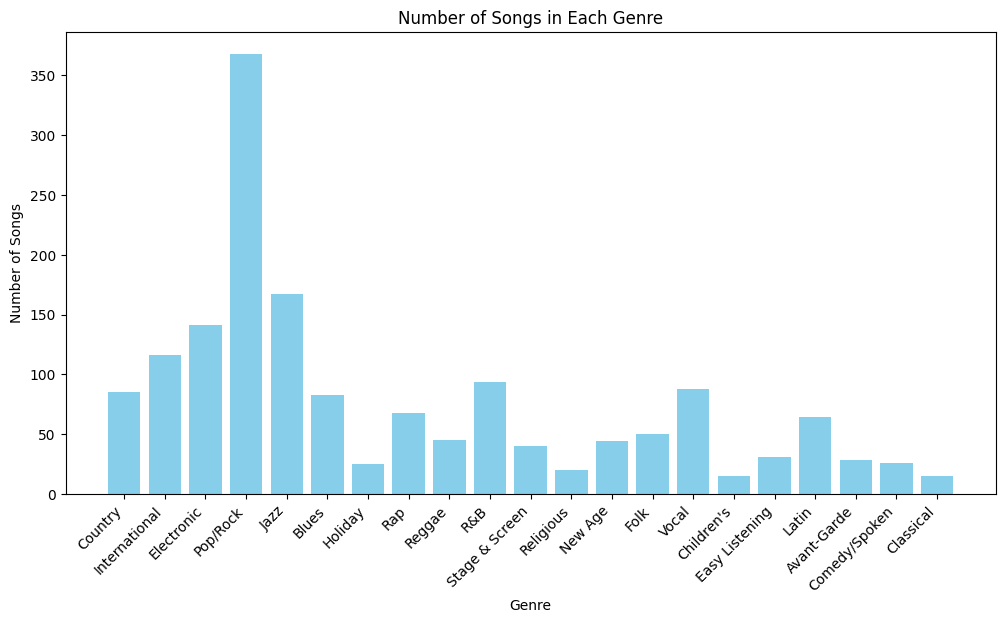

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# Split the GenresStr column into a list of genres
metadata_df['GenresList'] = metadata_df['GenresStr'].str.split(';')

# Flatten the list of genres and clean up genre names
all_genres = [genre.strip() for genres_list in metadata_df['GenresList'] for genre in genres_list]

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Plot the number of genres
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.title('Number of Songs in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

<ipython-input-7-63793d368f85>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_rock_df['MoodsList'] = pop_rock_df['MoodsStr'].str.split(';')


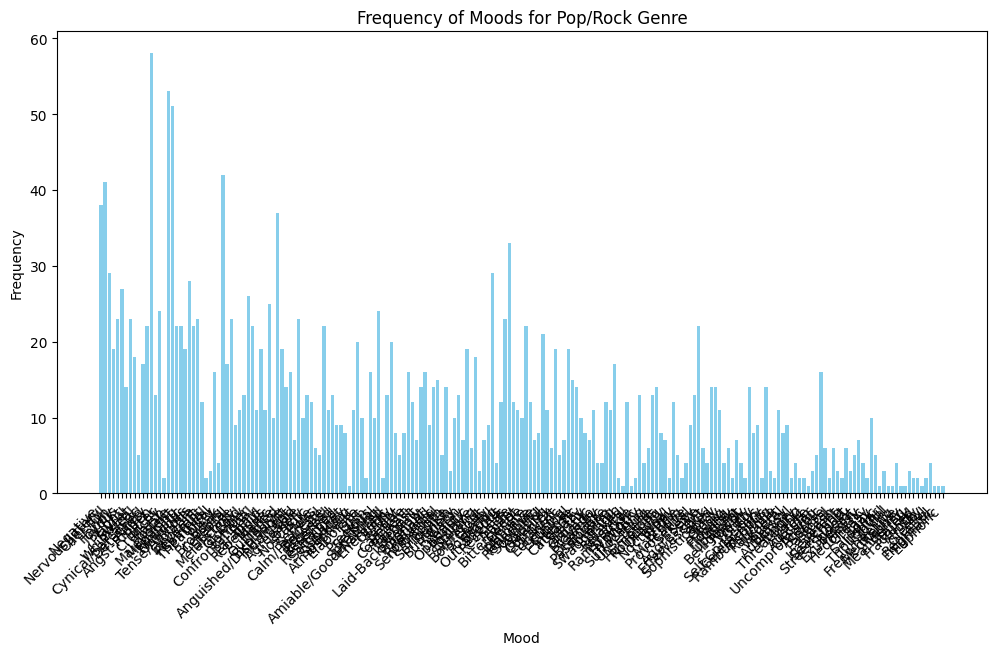

In [7]:
# Filter rows with "Pop/Rock" genre
pop_rock_df = metadata_df[metadata_df['GenresStr'].str.contains('Pop/Rock')]

# Split the MoodsStr column into a list of moods
pop_rock_df['MoodsList'] = pop_rock_df['MoodsStr'].str.split(';')

# Flatten the list of moods
all_moods_pop_rock = [mood.strip() for moods_list in pop_rock_df['MoodsList'] for mood in moods_list]

# Count the frequency of each mood
mood_counts_pop_rock = Counter(all_moods_pop_rock)

# Plot the frequency of moods for Pop/Rock genre
plt.figure(figsize=(12, 6))
plt.bar(mood_counts_pop_rock.keys(), mood_counts_pop_rock.values(), color='skyblue')
plt.title('Frequency of Moods for Pop/Rock Genre')
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

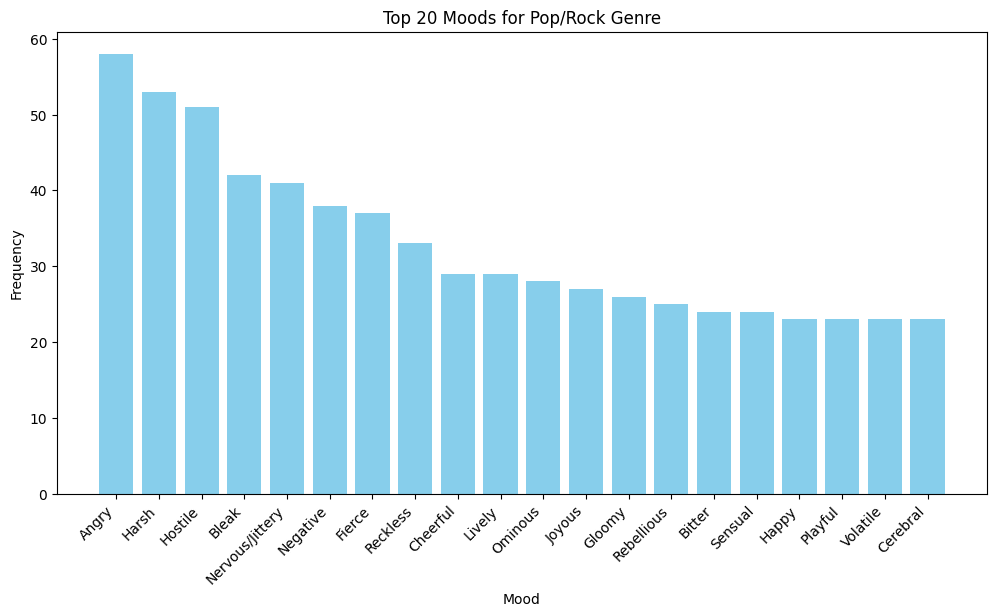

In [9]:

# Get the top 20 moods and their frequencies
top_20_moods_pop_rock = mood_counts_pop_rock.most_common(20)

# Extract the moods and frequencies
top_20_moods, top_20_frequencies = zip(*top_20_moods_pop_rock)

# Plot the top 20 moods for Pop/Rock genre
plt.figure(figsize=(12, 6))
plt.bar(top_20_moods, top_20_frequencies, color='skyblue')
plt.title('Top 20 Moods for Pop/Rock Genre')
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

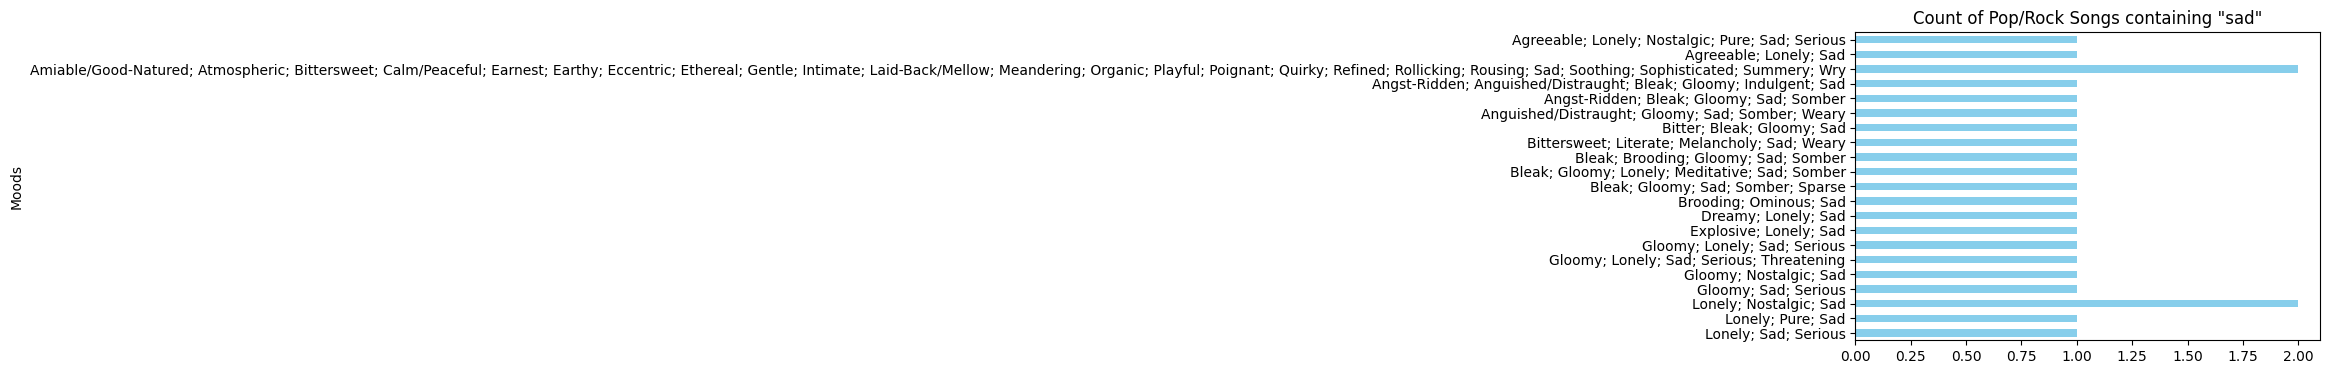

Number of Pop/Rock songs containing 'sad' : 23


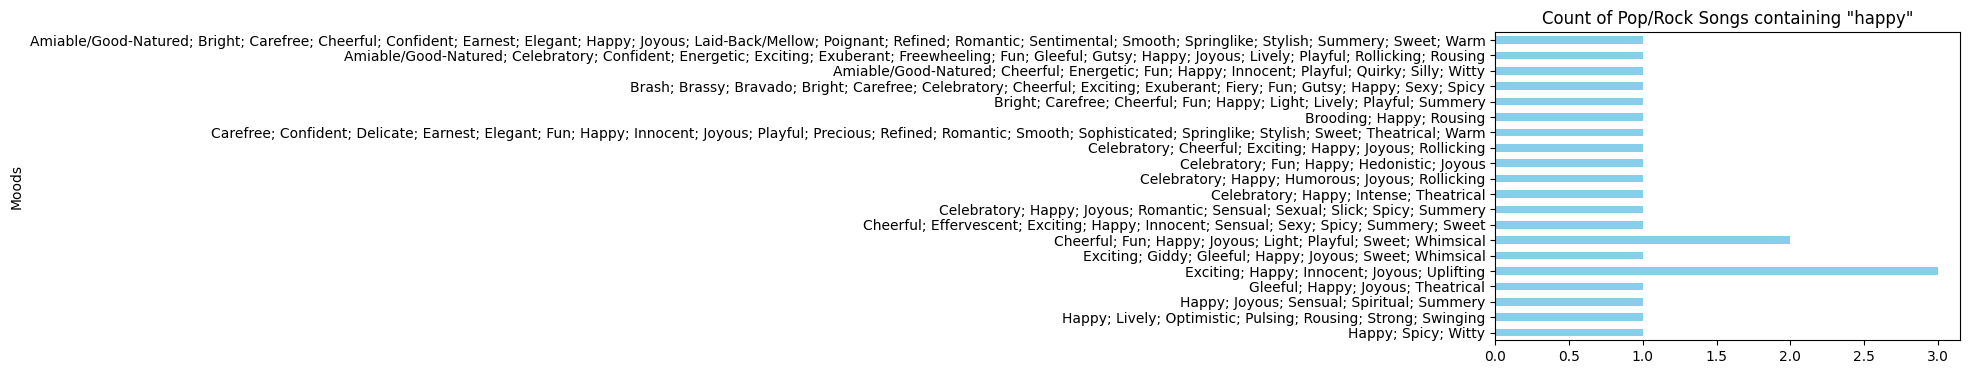

Number of Pop/Rock songs containing 'happy' : 23


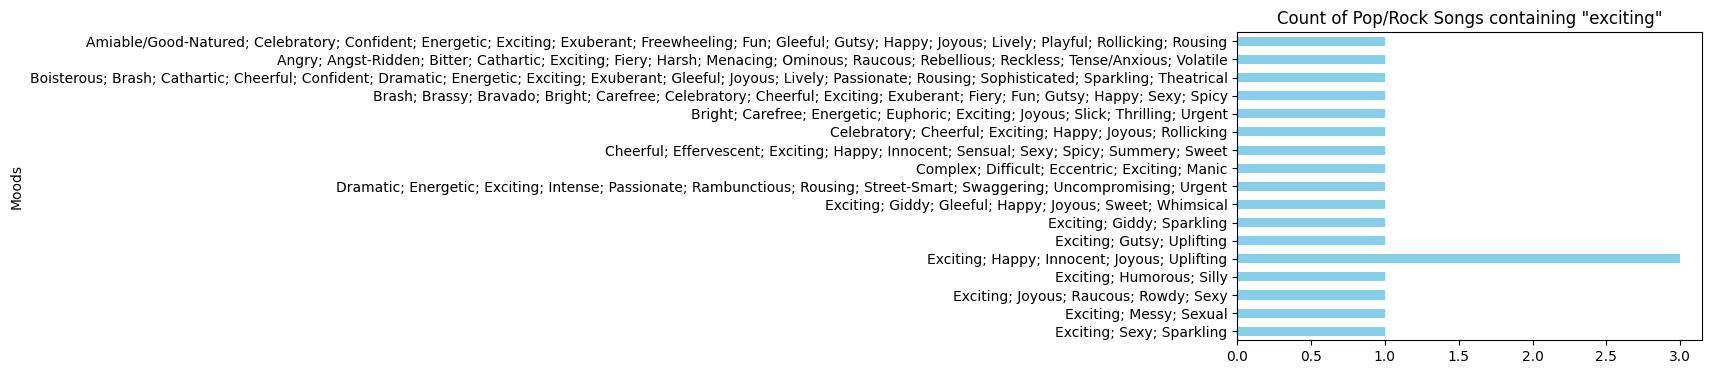

Number of Pop/Rock songs containing 'exciting' : 19


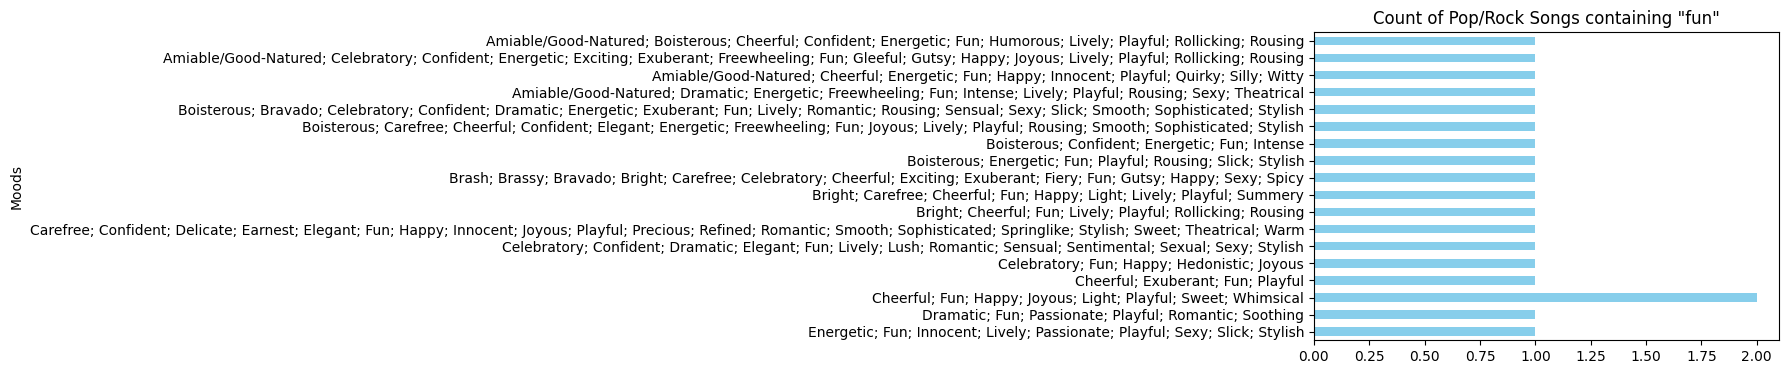

Number of Pop/Rock songs containing 'fun' : 19
No Pop/Rock songs containing 'tenderness' found.


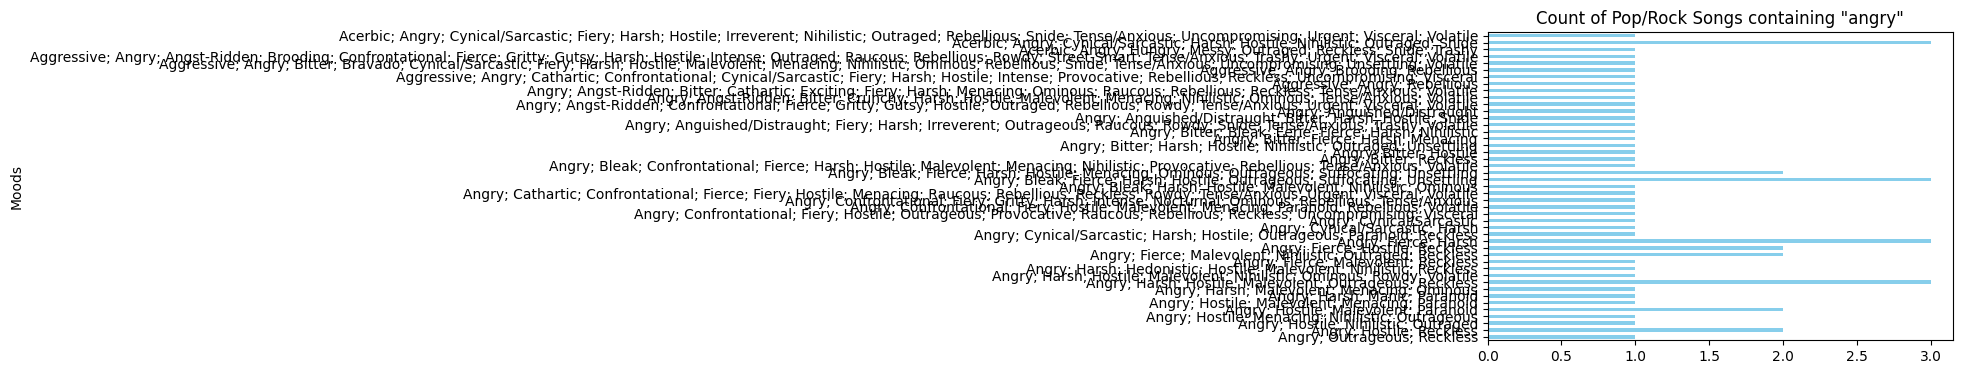

Number of Pop/Rock songs containing 'angry' : 58
No Pop/Rock songs containing 'scary' found.


In [10]:
# Filter Pop/Rock songs
# pop_rock_df = annotations_df[annotations_df['GenresStr'].str.contains('Pop/Rock')]

# Define the list of moods (We changed funny by fun)
moods_list = ['sad', 'happy', 'exciting', 'fun', 'tenderness', 'angry', 'scary']

# Create a dictionary to store DataFrames and plots for each mood
mood_data = {}

# Function to filter and plot for a given mood
def filter_and_plot(mood):
    # Filter songs containing the mood in the MoodsStr column
    filtered_df = pop_rock_df[pop_rock_df['MoodsStr'].str.contains(mood, case=False, regex=True)]

    # Check if there are any songs matching the mood
    if len(filtered_df) > 0:
        # Count and plot for the mood
        plt.figure(figsize=(6, 4))
        plt.title(f'Count of Pop/Rock Songs containing "{mood}"')
        plt.xlabel('Count')  # Change the x-axis label to 'Count'
        plt.ylabel('Moods')  # Change the y-axis label to 'Moods'
        plt.yticks(rotation=45, ha='right')  # Rotate y-axis labels for better visibility
        filtered_df['MoodsStr'].value_counts().sort_index(ascending=False).plot(kind='barh', color='skyblue')  # Flip the plot horizontally and sort by index
        plt.show()

        print(f"Number of Pop/Rock songs containing '{mood}' :", len(filtered_df))

        # Store the DataFrame and plot in the dictionary
        mood_data[mood] = (filtered_df, plt)
    else:
        print(f"No Pop/Rock songs containing '{mood}' found.")

# Loop through each mood and filter & plot
for mood in moods_list:
    filter_and_plot(mood)


In [12]:
# Filter Pop/Rock songs

# Filter songs containing Emotional #tags in the MoodsStr column
happy_sad_df = pop_rock_df[pop_rock_df['MoodsStr'].str.contains('happy|sad', case=False, regex=True)]
exciting_sad_df = pop_rock_df[pop_rock_df['MoodsStr'].str.contains('exciting|sad', case=False, regex=True)]
angry_sad_df = pop_rock_df[pop_rock_df['MoodsStr'].str.contains('angry|sad', case=False, regex=True)]

# Extract the relevant information and create a new DataFrame
result_happy_sad_df = pd.DataFrame({
    'Song': happy_sad_df['Song'],
    'Quadrant': happy_sad_df['Quadrant'],
    'SingleMood': happy_sad_df['MoodsStr'].apply(lambda x: 'happy' if 'happy' in x.lower() else  'sad')
})


# Extract the relevant information and create a new DataFrame
result_exciting_sad_df = pd.DataFrame({
    'Song': exciting_sad_df['Song'],
    'Quadrant': exciting_sad_df['Quadrant'],
    'SingleMood': exciting_sad_df['MoodsStr'].apply(lambda x: 'exciting' if 'exciting' in x.lower() else 'sad')
})

# Extract the relevant information and create a new DataFrame
result_angry_sad_df = pd.DataFrame({
    'Song': angry_sad_df['Song'],
    'Quadrant': angry_sad_df['Quadrant'],
    'SingleMood': angry_sad_df['MoodsStr'].apply(lambda x: 'angry' if 'angry' in x.lower() else 'sad')
})


# Display the new DataFrame
print(result_happy_sad_df.head())
print(result_exciting_sad_df.head())
print(result_angry_sad_df.head())

# Count the number of files in result_df
num_files = len(result_happy_sad_df)
num_files_exciting_sad = len(result_exciting_sad_df)
num_files_angry_sad = len(result_angry_sad_df)

# Display the number of files
print(f"Number of Files in result_happy_sad_df: {num_files}")
print(f"Number of Files in result_exciting_sad_df: {num_files_exciting_sad}")
print(f"Number of Files in result_angry_sad_df: {num_files_angry_sad}")

            Song Quadrant SingleMood
6   MT0000082187       Q1      happy
37  MT0000534539       Q3        sad
39  MT0000550961       Q4        sad
41  MT0000661250       Q3        sad
62  MT0000992846       Q1      happy
             Song Quadrant SingleMood
37   MT0000534539       Q3        sad
39   MT0000550961       Q4        sad
41   MT0000661250       Q3        sad
88   MT0001533920       Q3   exciting
183  MT0003053135       Q3        sad
            Song Quadrant SingleMood
9   MT0000133200       Q2      angry
13  MT0000216849       Q2      angry
25  MT0000377411       Q2      angry
37  MT0000534539       Q3        sad
39  MT0000550961       Q4        sad
Number of Files in result_happy_sad_df: 46
Number of Files in result_exciting_sad_df: 42
Number of Files in result_angry_sad_df: 81


In [13]:
# As you may notice, some Sad labels were ranked in Q3 and Q4.
# To avoid this ambiguity we will filter those emotion that match the Quadrant

filtered_df_happy_sad = result_happy_sad_df[result_happy_sad_df['Quadrant'].isin(['Q1', 'Q3'])]
result_happy_sad = filtered_df_happy_sad.groupby(['Quadrant', 'SingleMood']).size().unstack(fill_value=0)

filtered_df_exciting_sad = result_exciting_sad_df[result_exciting_sad_df['Quadrant'].isin(['Q1', 'Q3'])]
result_exciting_sad = filtered_df_exciting_sad.groupby(['Quadrant', 'SingleMood']).size().unstack(fill_value=0)

filtered_df_angry_sad = result_angry_sad_df[result_angry_sad_df['Quadrant'].isin(['Q2', 'Q3'])]
result_angry_sad = filtered_df_angry_sad.groupby(['Quadrant', 'SingleMood']).size().unstack(fill_value=0)


# Display the result
print(result_happy_sad)
print(result_exciting_sad)
print(result_angry_sad)

SingleMood  happy  sad
Quadrant              
Q1             21    0
Q3              0   20
SingleMood  exciting  sad
Quadrant                 
Q1                17    0
Q3                 1   20
SingleMood  angry  sad
Quadrant              
Q2             58    0
Q3              0   20


# FEATURES EXTRACTION

(This process will take time, so I recommend doing it only once and saving the files in .csv format with the extracted features for later analysis.)

In [ ]:
import os
import essentia.standard as es
import pandas as pd

# We will extraxt features from the filtered emotional pairs using the function provide by Essentia: MusicExtractor
# Specify the directories containing the audio files
directories = ['/content/Q1', '/content/Q3']

# Extract selected songs based on the filtered DataFrame
selected_files = filtered_df_exciting_sad['Song'].tolist()

In [ ]:
# Lists to store the results
file_names = []
features_list = []  # List to store extracted features
mood = []  # List to store the quadrant information

# Iterate through each directory
for directory in directories:
    # Iterate through each file in the directory
    for filename in os.listdir(directory):
        if filename.lower().endswith((".wav", ".mp3")):
            # Extract song ID from the filename
            song_id = os.path.splitext(filename)[0]

            # Check if the song is in the selected_files list
            if song_id in selected_files:
                # Form the complete file path
                audio_file_path = os.path.join(directory, filename)

                # Extract the features using MusicExtractor
                features, _ = es.MusicExtractor(
                    lowlevelStats=['mean', 'stdev'],
                    rhythmStats=['mean', 'stdev'],
                    tonalStats=['mean', 'stdev']
                )(audio_file_path)

                # Store the results in lists
                file_names.append(filename)
                features_list.append(features)
                mood.append(filtered_df_exciting_sad.loc[filtered_df_exciting_sad['Song'] == song_id, 'Quadrant'].values[0])

# Create a DataFrame from the collected results
data = {'File': file_names, 'Quadrant': mood}
df = pd.DataFrame(data)

# Add columns for each feature
for feature_name in features_list[0].descriptorNames():
    df[feature_name] = [feature[feature_name] for feature in features_list]


# Display the summary statistics
print(df.describe())

<ipython-input-18-96b64e5330b8>:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feature_name] = [feature[feature_name] for feature in features_list]
<ipython-input-18-96b64e5330b8>:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feature_name] = [feature[feature_name] for feature in features_list]
<ipython-input-18-96b64e5330b8>:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using 

       lowlevel.average_loudness  lowlevel.barkbands_crest.mean  \
count                  38.000000                      38.000000   
mean                    0.814293                      10.813057   
std                     0.200689                       1.866605   
min                     0.169189                       7.556463   
25%                     0.677571                       9.555514   
50%                     0.908016                      10.433599   
75%                     0.961768                      12.022691   
max                     0.977723                      15.215366   

       lowlevel.barkbands_crest.stdev  lowlevel.barkbands_flatness_db.mean  \
count                       38.000000                            38.000000   
mean                         4.178728                             0.216258   
std                          0.844576                             0.057454   
min                          2.734348                             0.117524   
25%   

In [ ]:
# Save the DataFrame to a CSV file
csv_file_path = "/content/exciting_sad_selected_features.csv"
df.to_csv(csv_file_path, index=False)

# FEATURES ANALYSIS


In [23]:
# you can start the project from the extrated and saved emotional-pairs-selected-features

import pandas as pd

# Load the CSV file
csv_file_path = "/content/happy_sad_selected_features.csv"
df = pd.read_csv(csv_file_path)

# Replace "Q1" with "Happy" and "Q3" with "Sad" in the "Quadrant" column
df["Quadrant"] = df["Quadrant"].replace({"Q1": "Happy", "Q3": "Sad"})
df = df.rename(columns={"Quadrant": "Emotion"})

# Initialize an empty DataFrame to store the selected samples
selected_samples_happy_sad_df = pd.DataFrame()

# Define the list of emotions (categories)
emotions = df["Emotion"].unique()

# Select 20 samples from each category
sample_size = 20
for emotion in emotions:
    category_samples = df[df["Emotion"] == emotion]
    selected_samples = category_samples.sample(n=sample_size, random_state=42)  # You can change the random_state if needed
    selected_samples_happy_sad_df = pd.concat([selected_samples_happy_sad_df, selected_samples])

# Display the selected samples
selected_samples_happy_sad_df


,File,Emotion,lowlevel.average_loudness,lowlevel.barkbands_crest.mean,lowlevel.barkbands_crest.stdev,lowlevel.barkbands_flatness_db.mean,lowlevel.barkbands_flatness_db.stdev,lowlevel.barkbands_kurtosis.mean,lowlevel.barkbands_kurtosis.stdev,lowlevel.barkbands_skewness.mean,...,metadata.version.essentia_git_sha,metadata.version.extractor,tonal.chords_key,tonal.chords_scale,tonal.key_edma.key,tonal.key_edma.scale,tonal.key_krumhansl.key,tonal.key_krumhansl.scale,tonal.key_temperley.key,tonal.key_temperley.scale
0,MT0005523766.mp3,Happy,0.947252,7.822063,2.952064,0.153885,0.031151,2.564884,5.697205,1.243708,...,v2.1_beta5-1110-g77a6a954,music 2.0,Bb,major,Bb,major,Bb,major,Bb,major
17,MT0000082187.mp3,Happy,0.927506,8.473329,3.385324,0.154619,0.031436,1.146046,3.824923,1.048252,...,v2.1_beta5-1110-g77a6a954,music 2.0,F#,major,F#,major,F#,major,F#,major
15,MT0029874624.mp3,Happy,0.945792,11.654750,4.996439,0.238021,0.074205,15.282432,31.074030,2.530926,...,v2.1_beta5-1110-g77a6a954,music 2.0,A,major,D,major,D,major,D,major
1,MT0002698706.mp3,Happy,0.952433,9.059210,3.573879,0.177692,0.035789,4.237372,5.840283,1.568669,...,v2.1_beta5-1110-g77a6a954,music 2.0,A,major,A,major,A,major,A,major
8,MT0018617125.mp3,Happy,0.594459,12.167811,4.251069,0.244406,0.041999,9.153096,13.286421,1.789943,...,v2.1_beta5-1110-g77a6a954,music 2.0,C,major,C,major,C,major,C,major
5,MT0010900969.mp3,Happy,0.734549,10.108603,4.595676,0.176967,0.050620,5.484161,13.705145,1.473225,...,v2.1_beta5-1110-g77a6a954,music 2.0,F,minor,F,minor,F,minor,F,minor
11,MT0034988131.mp3,Happy,0.963027,10.411682,4.181044,0.175944,0.045779,6.185128,9.971917,1.715490,...,v2.1_beta5-1110-g77a6a954,music 2.0,C#,major,C#,major,C#,major,C#,major
3,MT0018029465.mp3,Happy,0.973273,10.826264,3.708522,0.225711,0.053841,17.245796,20.774414,3.024979,...,v2.1_beta5-1110-g77a6a954,music 2.0,A,major,D,minor,D,minor,A,minor
18,MT0015028144.mp3,Happy,0.960160,12.126029,5.127265,0.226905,0.052397,5.713034,14.191746,1.604113,...,v2.1_beta5-1110-g77a6a954,music 2.0,F,minor,C#,major,C#,major,C#,major
16,MT0008222676.mp3,Happy,0.970520,8.534031,3.873707,0.148825,0.044970,4.041690,11.687039,1.403191,...,v2.1_beta5-1110-g77a6a954,music 2.0,C#,major,C#,major,C#,major,C#,major


In [24]:
# Angry-Sad

# Load the CSV file
csv_file_path = "/content/angry_sad_selected_features.csv"
df = pd.read_csv(csv_file_path)

df["Quadrant"] = df["Quadrant"].replace({"Q2": "Angry", "Q3": "Sad"})
df = df.rename(columns={"Quadrant": "Emotion"})

selected_samples_angry_sad_df = pd.DataFrame()
emotions = df["Emotion"].unique()

# Select 20 samples from each category
sample_size = 20
for emotion in emotions:
    category_samples = df[df["Emotion"] == emotion]
    selected_samples = category_samples.sample(n=sample_size, random_state=42)  # You can change the random_state if needed
    selected_samples_angry_sad_df = pd.concat([selected_samples_angry_sad_df, selected_samples])

# Display the selected samples
#selected_samples_angry_sad_df



In [25]:
#Exciting - Sad
# Load the CSV file
csv_file_path = "/content/exciting_sad_selected_features.csv"
df = pd.read_csv(csv_file_path)

df["Quadrant"] = df["Quadrant"].replace({"Q1": "Exciting", "Q3": "Sad"})
df = df.rename(columns={"Quadrant": "Emotion"})

selected_samples_exciting_sad_df = pd.DataFrame()
emotions = df["Emotion"].unique()

# Select 17! samples from each category
sample_size = 17
for emotion in emotions:
    category_samples = df[df["Emotion"] == emotion]
    selected_samples = category_samples.sample(n=sample_size, random_state=42)  # You can change the random_state if needed
    selected_samples_exciting_sad_df = pd.concat([selected_samples_exciting_sad_df, selected_samples])

# Display the selected samples
#selected_samples_exciting_sad_df

In [37]:
relevant_features = [
    'tonal.chords_key',
    'tonal.key_krumhansl.scale', # mode major vs minor
    'tonal.chords_changes_rate', # harmony complex?
    'rhythm.bpm', # Tempo fast vs slow
    'lowlevel.dissonance.mean', # harmony complex?
    'lowlevel.dissonance.stdev', # harmony complex?
    'lowlevel.average_loudness', # loudness
    'lowlevel.pitch_salience.mean', # melody
    'lowlevel.pitch_salience.stdev', # melody
    'rhythm.onset_rate', # note onset
    'lowlevel.spectral_centroid.mean',
    'lowlevel.spectral_centroid.stdev',
    'tonal.hpcp_entropy.mean',
    'tonal.hpcp_entropy.stdev',


    #'rhythm.beats_loudness.mean',
    #'rhythm.beats_loudness.stdev',
    #'rhythm.bpm_histogram_first_peak_bpm',
    #'rhythm.danceability',
    #'tonal.chords_changes_rate',
    #'tonal.chords_number_rate',
    #'tonal.chords_strength.mean',
    #'tonal.chords_strength.stdev',
    #'lowlevel.loudness_ebu128.integrated',
    #'lowlevel.loudness_ebu128.loudness_range',
    #'lowlevel.spectral_centroid.mean',
    #'lowlevel.spectral_rolloff.mean',
    #'lowlevel.spectral_entropy.mean',
    #'lowlevel.spectral_flux.mean',
    #'lowlevel.spectral_strongpeak.mean',
    #'lowlevel.pitch_salience.mean',
    #'lowlevel.pitch_salience.stdev',
    #'lowlevel.spectral_skewness.mean',
    #'lowlevel.spectral_skewness.stdev',
    #'lowlevel.spectral_kurtosis.mean',
    #'lowlevel.spectral_kurtosis.stdev',
    #'lowlevel.zerocrossingrate.mean'
]

In [38]:
# Create a new DataFrame with the selected columns
selected_samples_happy_sad_df = selected_samples_happy_sad_df[['Emotion'] + relevant_features]
selected_samples_angry_sad_df = selected_samples_angry_sad_df[['Emotion'] + relevant_features]
selected_samples_exciting_sad_df = selected_samples_exciting_sad_df[['Emotion'] + relevant_features]



In [39]:
# Function to apply transformations
def transform_dataframe(df):
    # Create a copy of the DataFrame to avoid modifying the original unintentionally
    df_transformed = df.copy()

    # Mapping for scale conversion
    mode_mapping = {"major": 1, "minor": 0}

    # Mapping for key conversion
    key_mapping = {
        "C": 0, "C#": 1, "Db": 1, "D": 2, "D#": 3, "Eb": 3, "E": 4, "F": 5,
        "F#": 6, "Gb": 6, "G": 7, "G#": 8, "Ab": 8, "A": 9, "A#": 10, "Bb": 10, "B": 11
    }

    # Apply transformations
   # df_transformed["tonal.chords_scale"] = df_transformed["tonal.chords_scale"].map(mode_mapping)
    df_transformed["tonal.key_krumhansl.scale"] = df_transformed["tonal.key_krumhansl.scale"].map(mode_mapping)
    df_transformed["tonal.chords_key"] = df_transformed["tonal.chords_key"].map(key_mapping)

    return df_transformed

# Apply the transformation function to your DataFrame
df_selected_transformed_angry_sad = transform_dataframe(selected_samples_angry_sad_df)
df_selected_transformed_happy_sad = transform_dataframe(selected_samples_happy_sad_df)
df_selected_transformed_exciting_sad = transform_dataframe(selected_samples_exciting_sad_df)



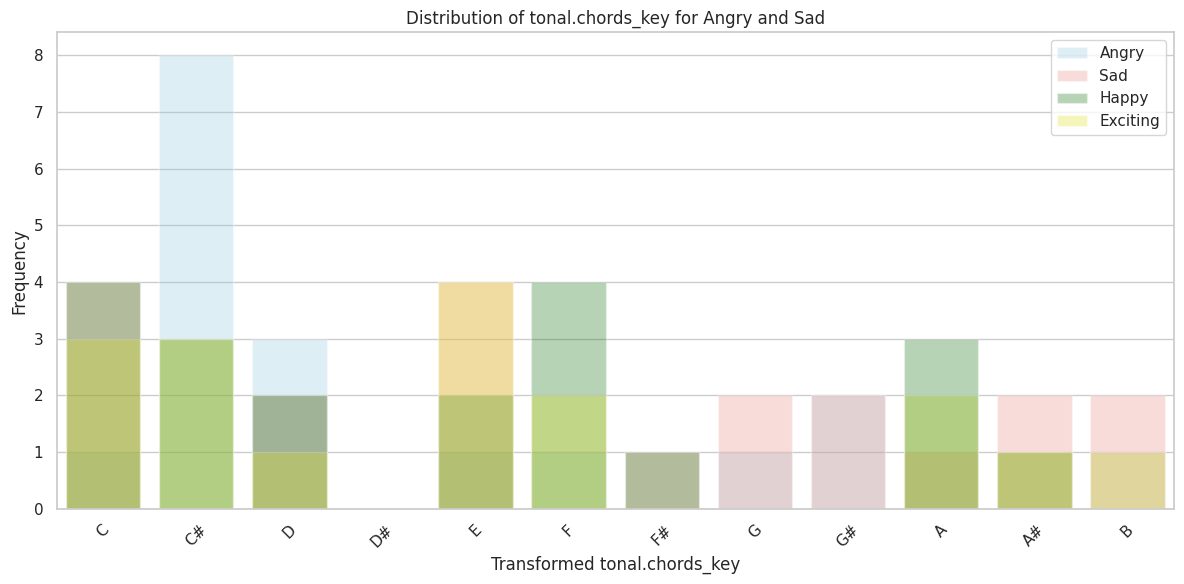

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping for key conversion
key_mapping = {
    0: "C", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F",
    6: "F#", 7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"
}


# Filter the data for "angry" and "Sad" emotions
angry_data = df_selected_transformed_angry_sad[df_selected_transformed_angry_sad["Emotion"] == "Angry"]
sad_data = df_selected_transformed_angry_sad[df_selected_transformed_angry_sad["Emotion"] == "Sad"]
happy_data = df_selected_transformed_happy_sad[df_selected_transformed_happy_sad["Emotion"] == "Happy"]
exciting_data = df_selected_transformed_exciting_sad[df_selected_transformed_exciting_sad["Emotion"] == "Exciting"]

# Create a copy of the DataFrame to ensure mapping consistency
angry_data_mapped = angry_data.copy()
sad_data_mapped = sad_data.copy()
happy_data_mapped = happy_data.copy()
exciting_data_mapped = exciting_data.copy()

# Map the tonal.chords_key values to the corresponding notes
angry_data_mapped["tonal.chords_key"] = angry_data_mapped["tonal.chords_key"].map(key_mapping)
sad_data_mapped["tonal.chords_key"] = sad_data_mapped["tonal.chords_key"].map(key_mapping)
happy_data_mapped["tonal.chords_key"] = happy_data_mapped["tonal.chords_key"].map(key_mapping)
exciting_data_mapped["tonal.chords_key"] = exciting_data_mapped["tonal.chords_key"].map(key_mapping)


# Calculate the frequency of tonal.chords_key for emotions
angry_counts = angry_data_mapped["tonal.chords_key"].value_counts().reindex(list(key_mapping.values())).fillna(0)
sad_counts = sad_data_mapped["tonal.chords_key"].value_counts().reindex(list(key_mapping.values())).fillna(0)
happy_counts = happy_data_mapped["tonal.chords_key"].value_counts().reindex(list(key_mapping.values())).fillna(0)
exciting_counts = exciting_data_mapped["tonal.chords_key"].value_counts().reindex(list(key_mapping.values())).fillna(0)


# Set the figure size for the plot
plt.figure(figsize=(12, 6))


sns.barplot(x=angry_counts.index, y=angry_counts.values, color="skyblue", label="Angry", alpha=0.3)
sns.barplot(x=sad_counts.index, y=sad_counts.values, color="salmon", label="Sad", alpha=0.3)
sns.barplot(x=happy_counts.index, y=happy_counts.values, color="green", label="Happy", alpha=0.3)
sns.barplot(x=exciting_counts.index, y=exciting_counts.values, color="yellow", label="Exciting", alpha=0.3)

# Add labels and legend
plt.title("Distribution of tonal.chords_key for Angry and Sad")
plt.xlabel("Transformed tonal.chords_key")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

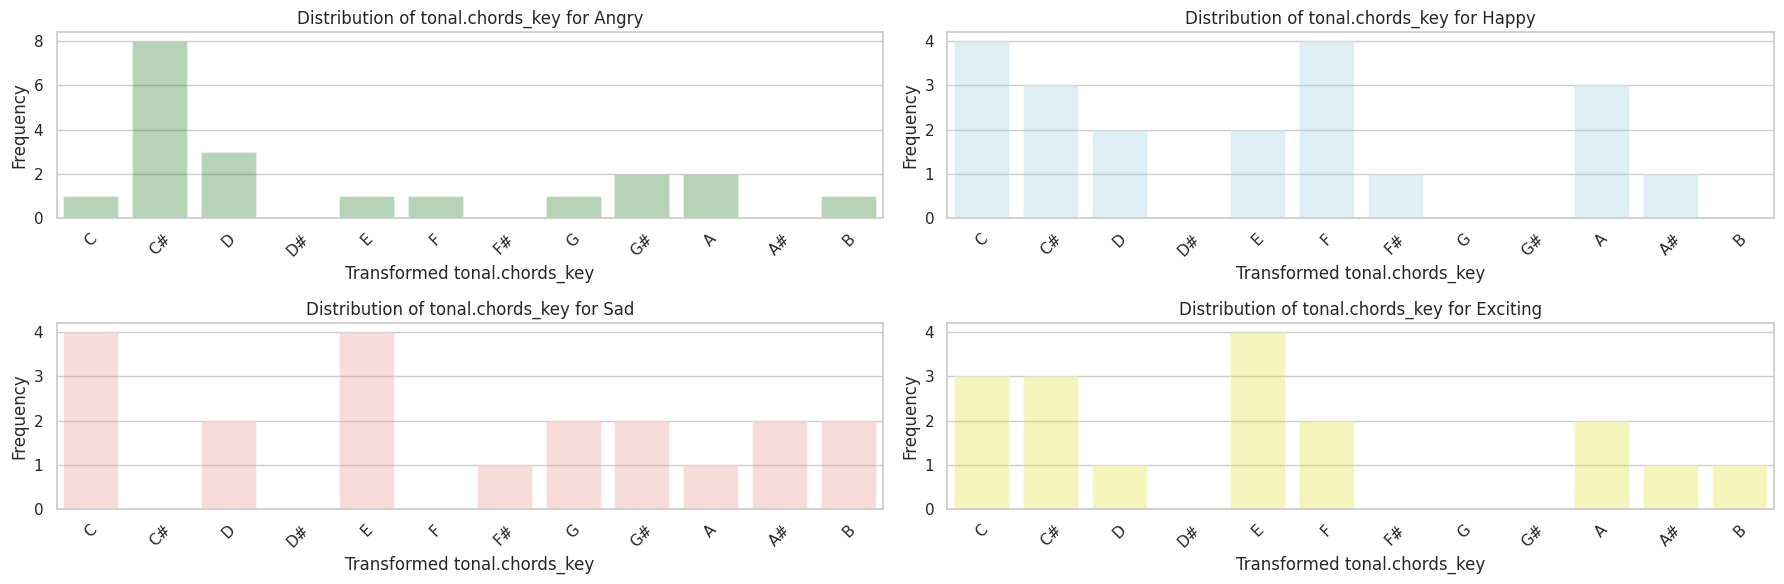

In [41]:
# KEY vs EMOTIONS
# Set the figure size for the plots
plt.figure(figsize=(18, 6))

# Create the first bar plot for "Angry" emotion
plt.subplot(221)  # 2 rows, 2 columns, 1st subplot
sns.barplot(x=angry_counts.index, y=angry_counts.values, color="green", alpha=0.3)
plt.title("Distribution of tonal.chords_key for Angry")
plt.xlabel("Transformed tonal.chords_key")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Create the second bar plot for "Happy" emotion
plt.subplot(222)  # 2 rows, 2 columns, 2nd subplot
sns.barplot(x=happy_counts.index, y=happy_counts.values, color="skyblue", alpha=0.3)
plt.title("Distribution of tonal.chords_key for Happy")
plt.xlabel("Transformed tonal.chords_key")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Create the third bar plot for "Sad" emotion
plt.subplot(223)  # 2 rows, 2 columns, 3rd subplot
sns.barplot(x=sad_counts.index, y=sad_counts.values, color="salmon", alpha=0.3)
plt.title("Distribution of tonal.chords_key for Sad")
plt.xlabel("Transformed tonal.chords_key")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Create the fourth bar plot for "Exciting" emotion
plt.subplot(224)  # 2 rows, 2 columns, 4th subplot
sns.barplot(x=exciting_counts.index, y=exciting_counts.values, color="yellow", alpha=0.3)
plt.title("Distribution of tonal.chords_key for Exciting")
plt.xlabel("Transformed tonal.chords_key")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

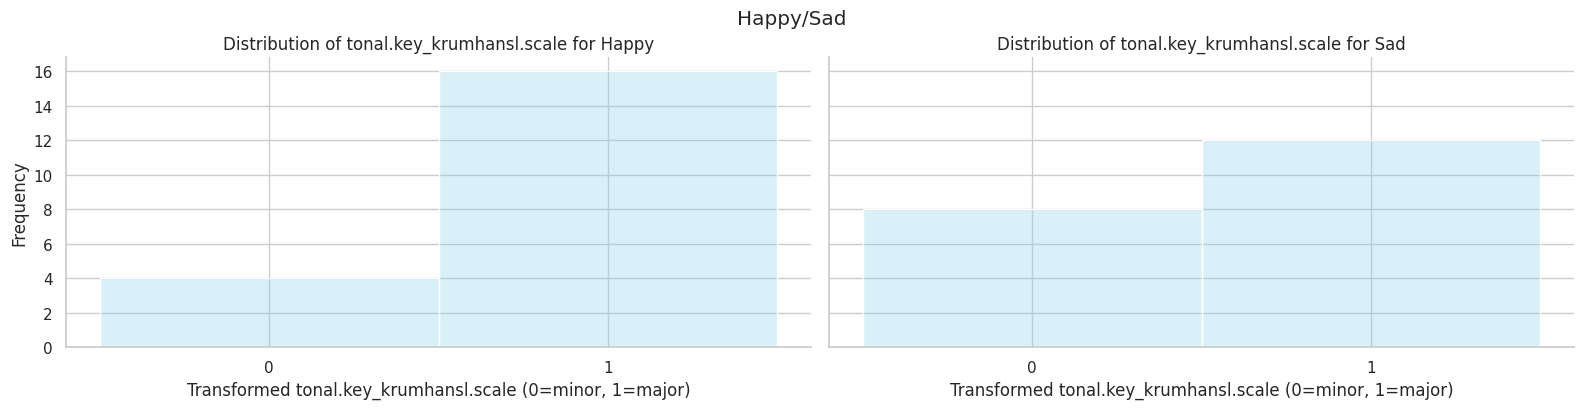

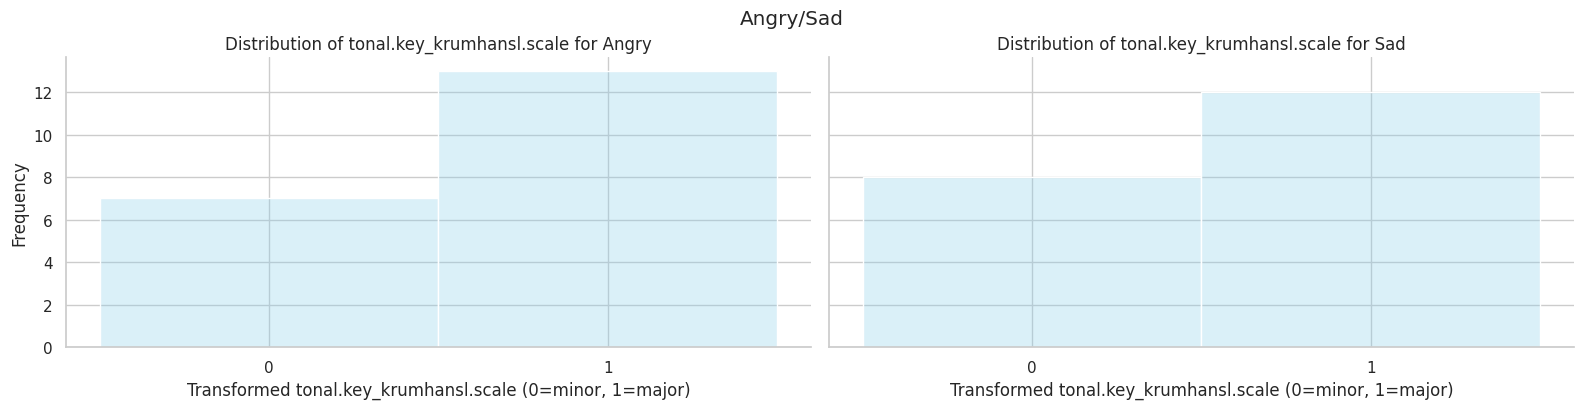

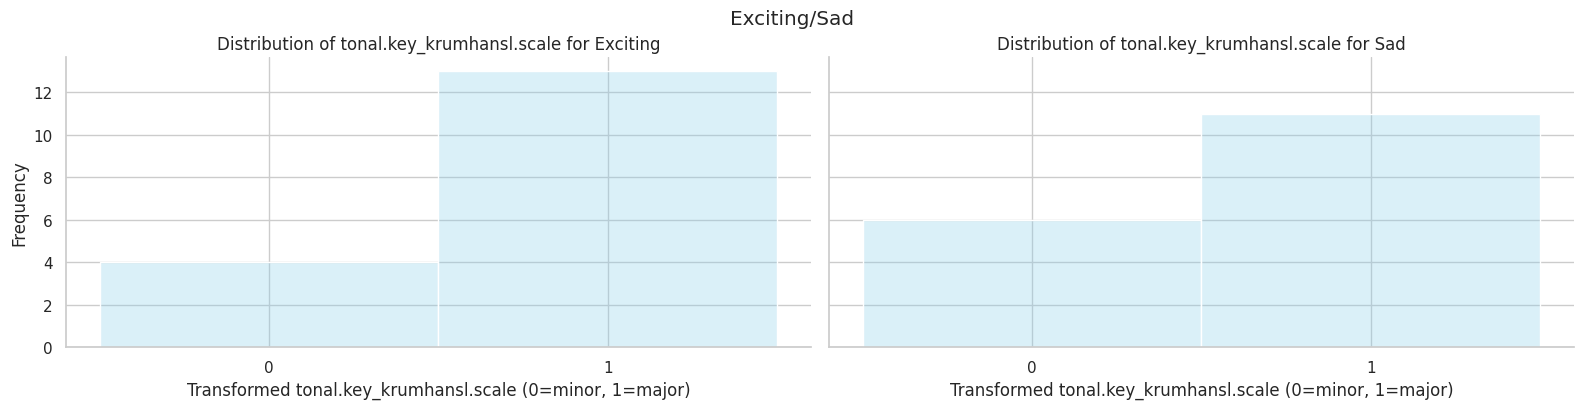

In [31]:
# MODE vs EMOTIONS

# Function to create facet grid and plot histograms
def create_and_plot_facetgrid(data_frame, title):
    g = sns.FacetGrid(data_frame, col="Emotion", height=4, aspect=2)  # Adjust height and aspect
    g.map(sns.histplot, "tonal.key_krumhansl.scale", bins=[-0.5, 0.5, 1.5], color="skyblue" , alpha=0.3)
    g.set_axis_labels("Transformed tonal.key_krumhansl.scale (0=minor, 1=major)", "Frequency")
    g.set_titles("Distribution of tonal.key_krumhansl.scale for {col_name}")

    # Set x-axis ticks to show "0" and "1" labels
    g.set(xticks=[0, 1])

    # Show the plot
    plt.tight_layout()
    plt.suptitle(title, y=1.02)  # Add a title above the plots
    plt.show()

# Call the function for each DataFrame and title
create_and_plot_facetgrid(df_selected_transformed_happy_sad, "Happy/Sad")
create_and_plot_facetgrid(df_selected_transformed_angry_sad, "Angry/Sad")
create_and_plot_facetgrid(df_selected_transformed_exciting_sad, "Exciting/Sad")

In [ ]:
#---df_selected_transformed_angry_sad = transform_dataframe(selected_samples_angry_sad_df)
#--df_selected_transformed_happy_sad = transform_dataframe(selected_samples_happy_sad_df)
#--df_selected_transformed_exciting_sad = transform_dataframe(selected_samples_exciting_sad_df)


In [32]:
# STATISTICS FOR CONTINOUS FEATURES

# Group the DataFrame by 'Semantic_Prediction' and calculate descriptive statistics
statistics_features_angry_sad = df_selected_transformed_angry_sad.groupby('Emotion')[relevant_features[2:]].describe()
statistics_features_happy_sad = df_selected_transformed_happy_sad.groupby('Emotion')[relevant_features[2:]].describe()
statistics_features_exciting_sad = df_selected_transformed_exciting_sad.groupby('Emotion')[relevant_features[2:]].describe()
statistics_features_happy_sad

tonal.chords_changes_rate                                          \
                            count      mean       std       min       25%   
Emotion                                                                     
Happy                        20.0  0.059679  0.024857  0.026357  0.041217   
Sad                          20.0  0.044766  0.016238  0.015480  0.038136   

                                      rhythm.bpm              ...  \
              50%       75%       max      count        mean  ...   
Emotion                                                       ...   
Happy    0.056327  0.069723  0.130769       20.0  129.759614  ...   
Sad      0.040994  0.049602  0.077519       20.0  117.785979  ...   

        tonal.hpcp_entropy.stdev           rhythm.danceability            \
                             75%       max               count      mean   
Emotion                                                                    
Happy                   0.801878  0.859948                20.0  1.312815   
Sad                     0.731272  0.817489                20.0  1.062322   

                                                                     
              std       min       25%       50%       75%       max  
Emotion                                                              
Happy    0.195502  0.967727  1.182781  1.264859  1.440891  1.704688  
Sad      0.177263  0.860258  0.951785  1.010375  1.129632  1.614321  

[2 rows x 104 columns]

In [33]:
# Extract the "rhythm.bpm" column

rhythm_onset_rate_column = statistics_features_happy_sad['rhythm.onset_rate']

# Display the extracted column
rhythm_onset_rate_column

,count,mean,std,min,25%,50%,75%,max
Emotion,,,,,,,,
Happy,20.0,4.067637,0.754419,2.725932,3.489483,4.053291,4.349496,5.684566
Sad,20.0,2.878060,0.631940,1.429452,2.636714,2.846155,3.149782,4.687274


In [ ]:
# Filter the data for "Happy" and "Sad" emotions
#happy_data = df_selected_transformed_happy_sad[df_selected_transformed_happy_sad["Emotion"] == "Happy"]
#sad_data = df_selected_transformed_happy_sad[df_selected_transformed_happy_sad["Emotion"] == "Sad"]

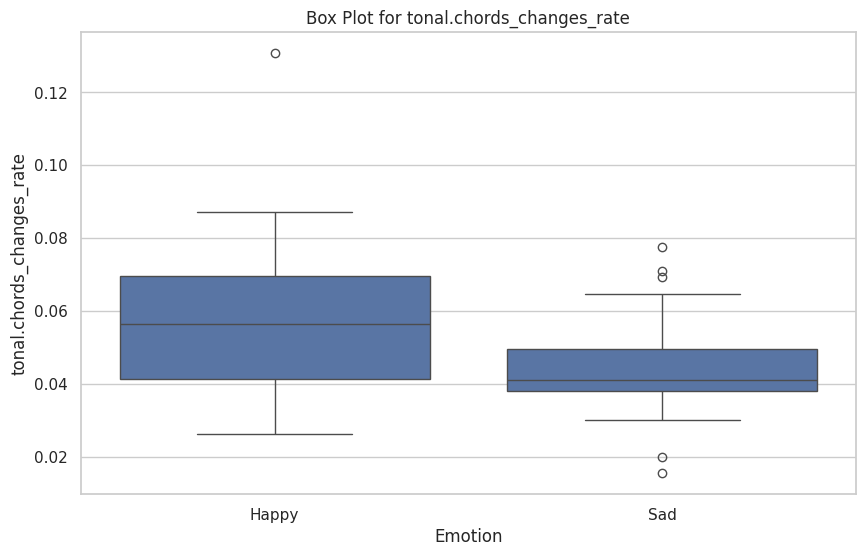

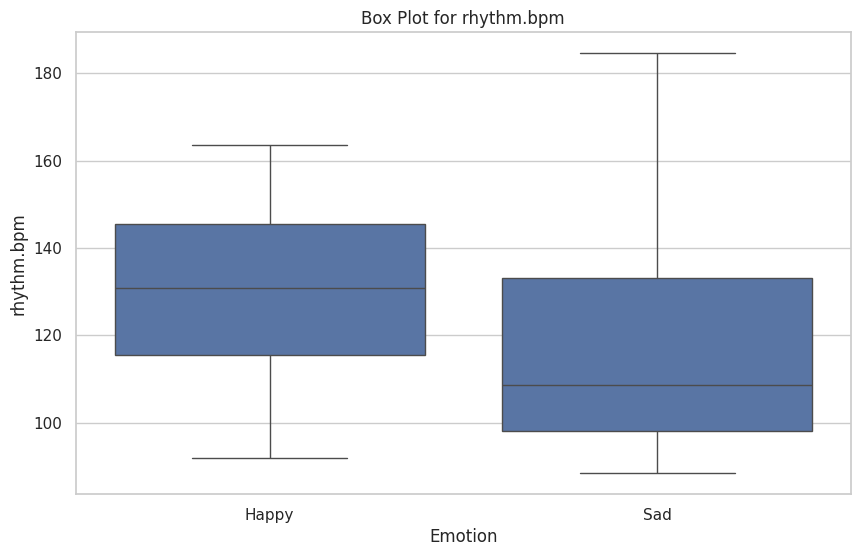

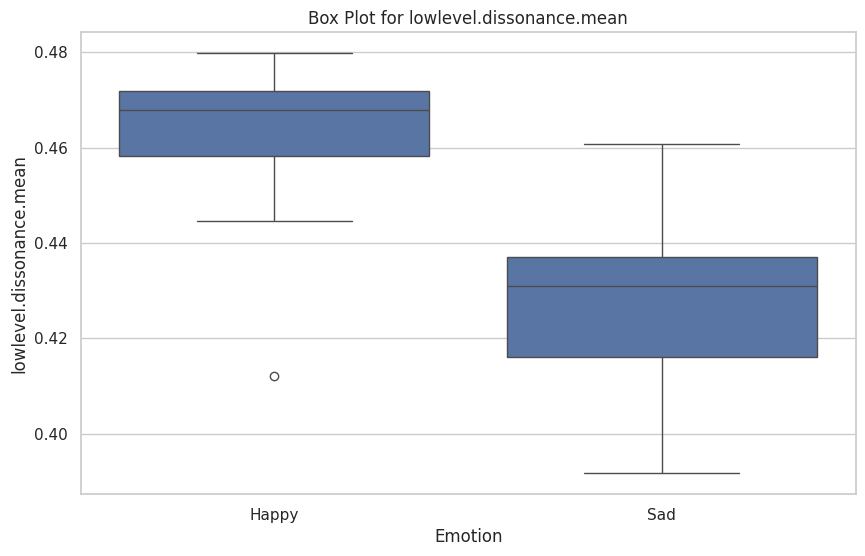

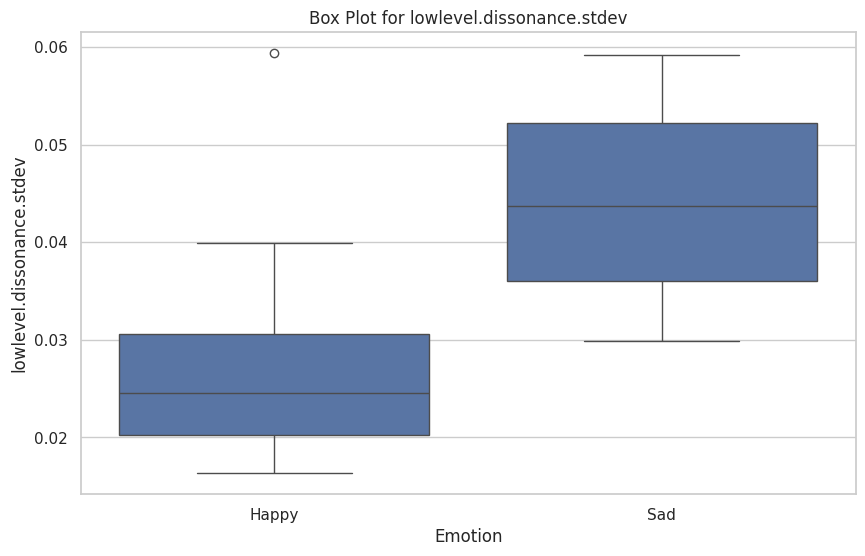

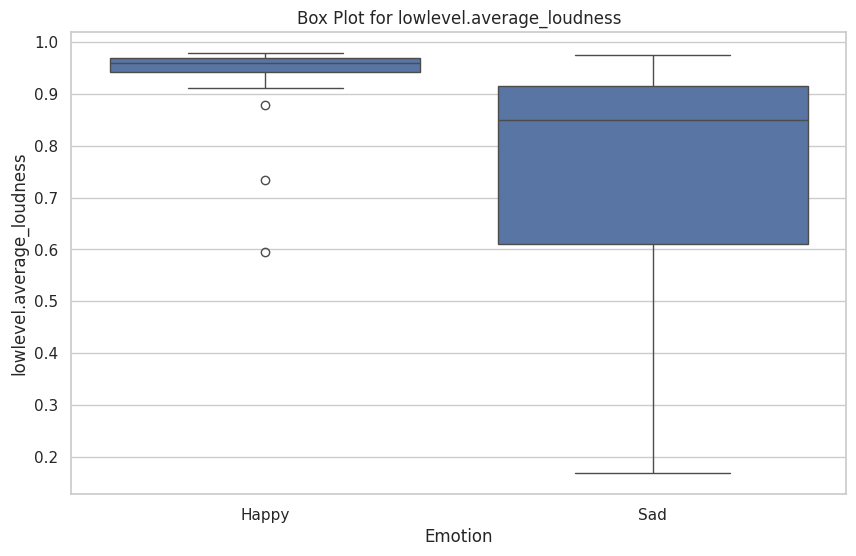

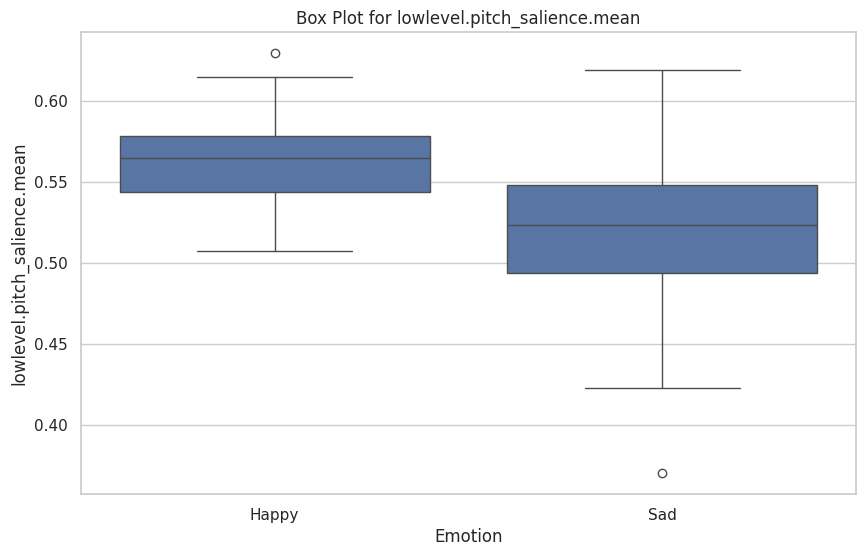

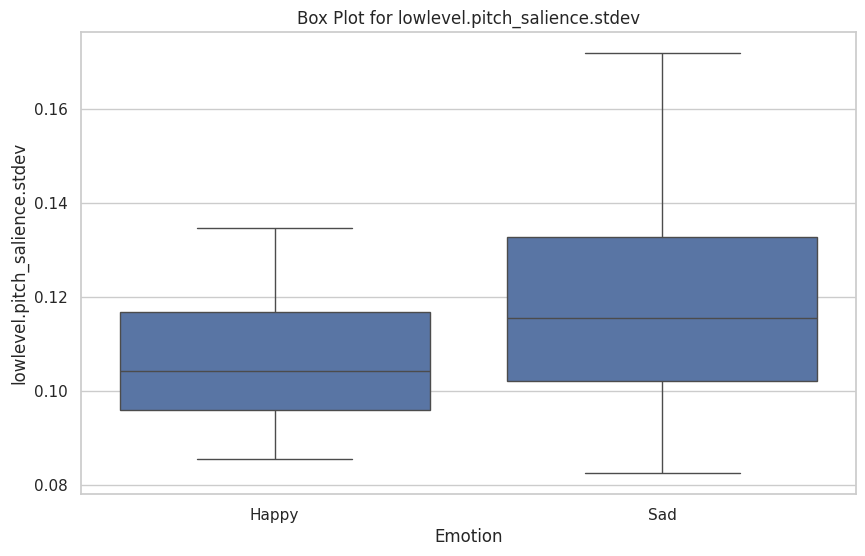

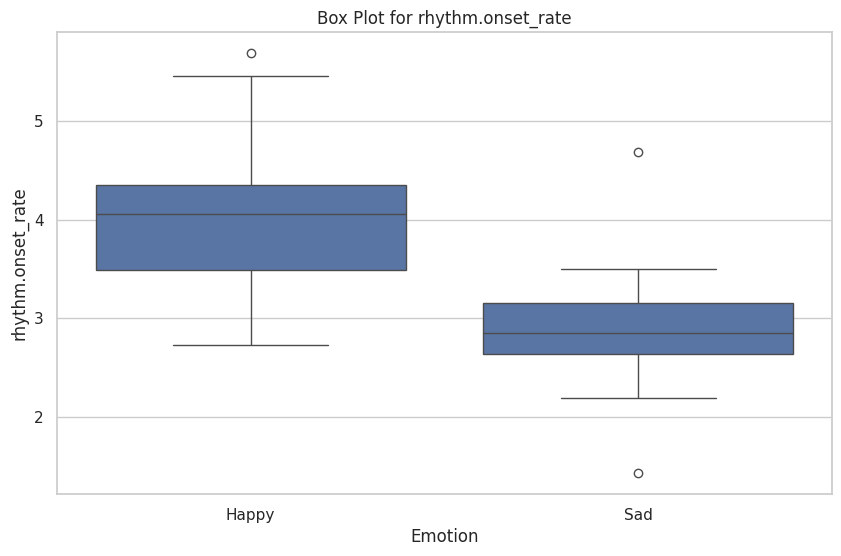

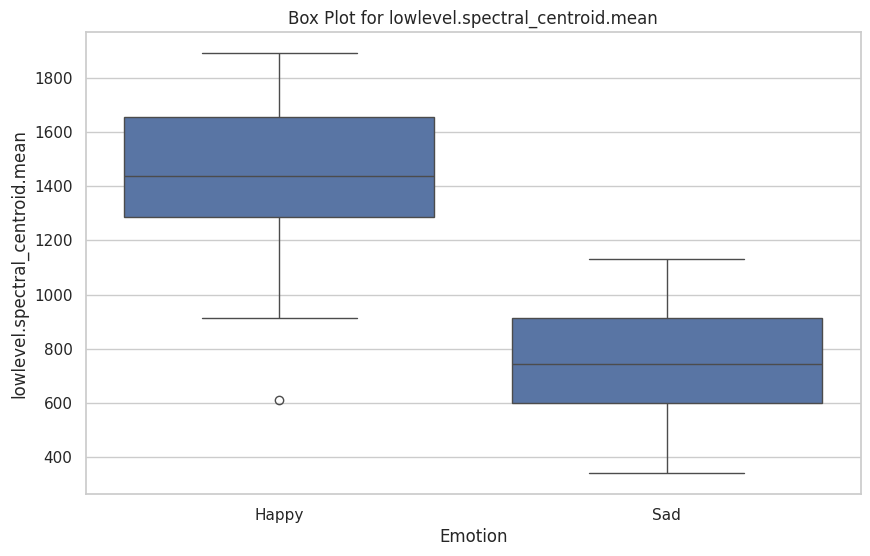

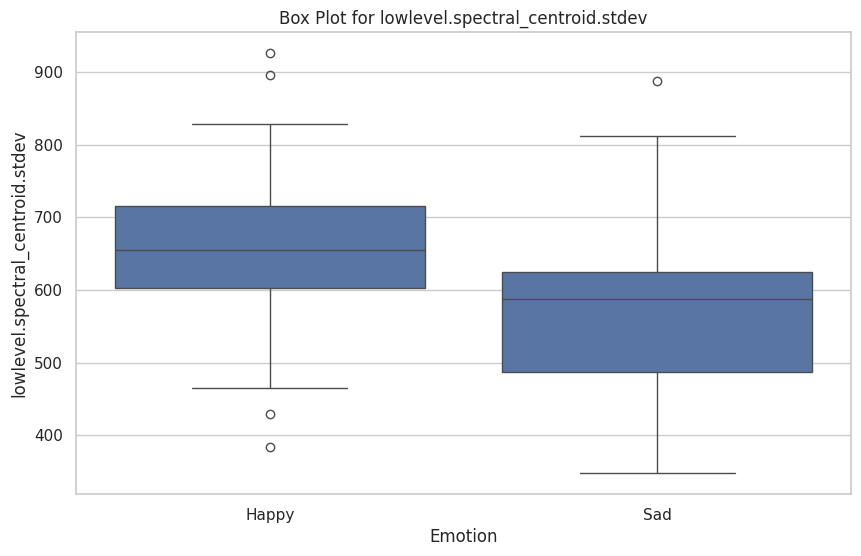

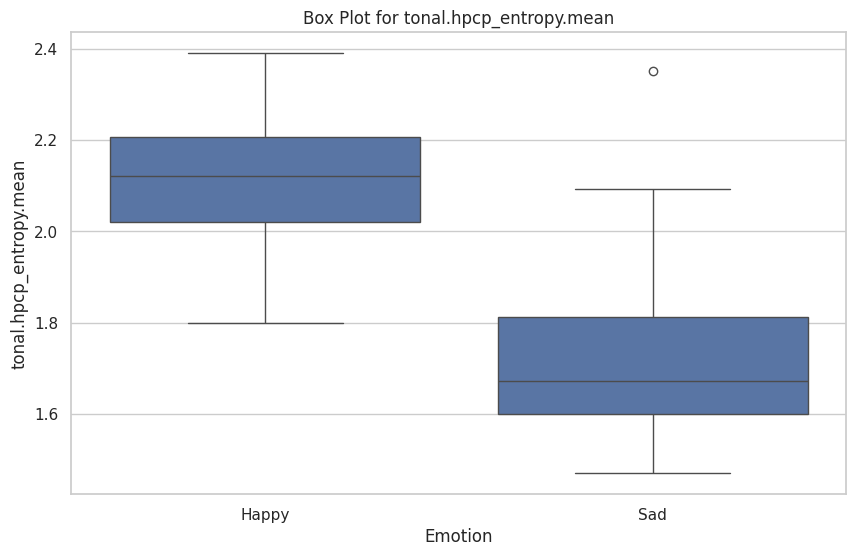

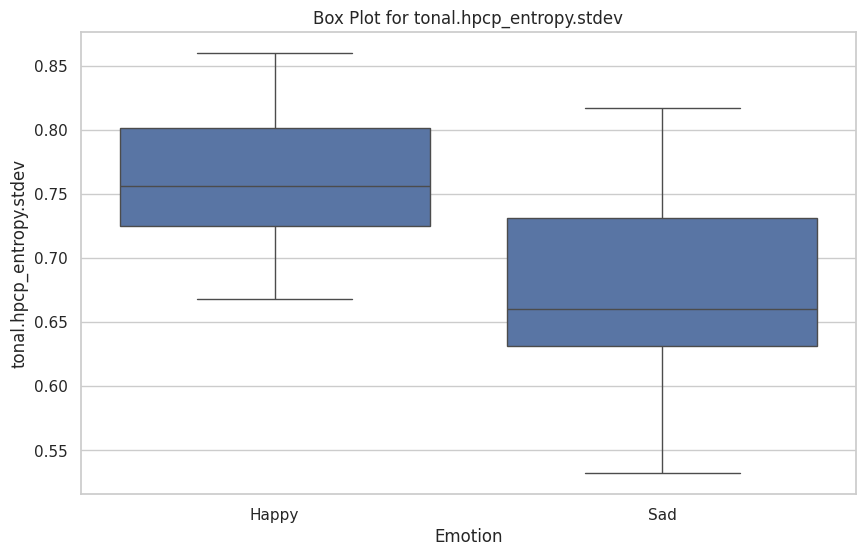

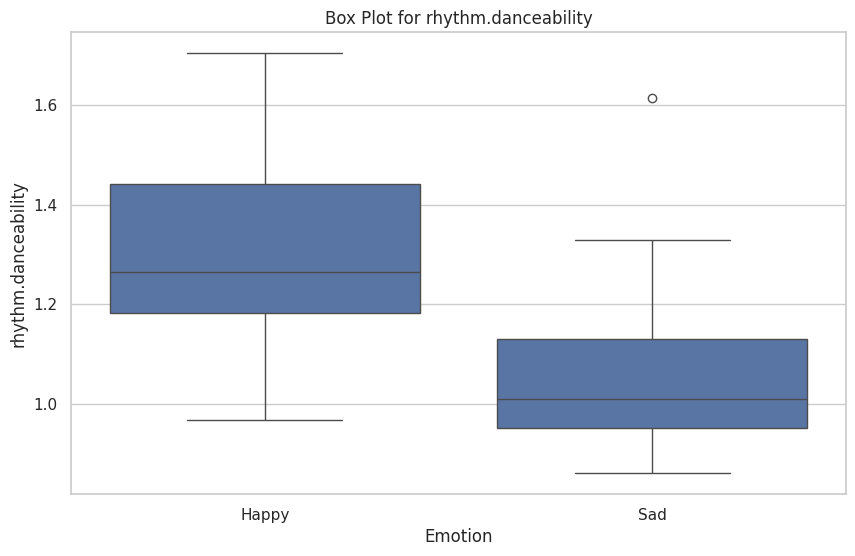

In [34]:
# SATATISTICS PLOTS
# Set the style of seaborn
sns.set(style="whitegrid")

# Select features starting from the third column
selected_features = relevant_features[2:]

# Loop through each feature and create a box plot
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Emotion', y=feature, data=df_selected_transformed_happy_sad)
    plt.title(f'Box Plot for {feature}')
    plt.show()

# SIGNIFICANCE TESTS


In [35]:
from scipy import stats
from scipy.stats import chi2_contingency

# List of features to perform tests on
features = [
    'tonal.chords_key',
    'tonal.key_krumhansl.scale', # mode major vs minor
    'tonal.chords_changes_rate', # harmony complex?
    'rhythm.bpm', # Tempo fast vs slow
    'lowlevel.dissonance.mean', # harmony complex?
    'lowlevel.dissonance.stdev', # harmony complex?
    'lowlevel.average_loudness', # loudness
    'lowlevel.pitch_salience.mean', # melody
    'lowlevel.pitch_salience.stdev', # melody
    'rhythm.onset_rate', # note onset
    'lowlevel.spectral_centroid.mean',
    'lowlevel.spectral_centroid.stdev',
    'tonal.hpcp_entropy.mean',
    'tonal.hpcp_entropy.stdev',
    'rhythm.danceability',

]

# Create an empty list to store the results
results = []

# Perform statistical tests for each feature
for feature in features:
    if feature in ['tonal.key_krumhansl.scale', 'tonal.chords_key']:
        # Perform Chi-square test for categorical features
        contingency_table = pd.crosstab(df_selected_transformed_happy_sad['Emotion'], df_selected_transformed_happy_sad[feature])
        chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)
        is_significant = p_value < 0.05
        test_name = 'Chi-square test'
        statistic = chi2_stat
    else:
        # Check if the data follows a normal distribution
        happy_data = df_selected_transformed_happy_sad[df_selected_transformed_happy_sad['Emotion'] == 'Happy'][feature]
        sad_data = df_selected_transformed_happy_sad[df_selected_transformed_happy_sad['Emotion'] == 'Sad'][feature]
        w_statistic, p_value = stats.shapiro(happy_data)
        is_normal_happy = p_value > 0.05
        w_statistic, p_value = stats.shapiro(sad_data)
        is_normal_sad = p_value > 0.05

        if is_normal_happy and is_normal_sad:
            # Data follows normal distribution, perform t-test
            t_statistic, p_value = stats.ttest_ind(happy_data, sad_data)
            is_significant = p_value < 0.05
            test_name = 't-test'
            statistic = t_statistic
        else:
            # Data does not follow normal distribution, perform Mann-Whitney U-test
            mann_whitney_u_statistic, mann_whitney_u_p_value = stats.mannwhitneyu(happy_data, sad_data)
            is_significant = mann_whitney_u_p_value < 0.05
            test_name = 'Mann-Whitney U-test'
            statistic = mann_whitney_u_statistic

    results.append({'Feature': feature, 'Test': test_name, 'Statistic': statistic, 'P-value': p_value, 'Significant': is_significant})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the results
results_df


,Feature,Test,Statistic,P-value,Significant
0,tonal.chords_key,Chi-square test,15.000000,1.320619e-01,False
1,tonal.key_krumhansl.scale,Chi-square test,1.071429,3.006230e-01,False
2,tonal.chords_changes_rate,t-test,2.246272,3.057883e-02,True
3,rhythm.bpm,Mann-Whitney U-test,268.000000,1.425991e-02,False
4,lowlevel.dissonance.mean,Mann-Whitney U-test,374.000000,7.705006e-01,True
5,lowlevel.dissonance.stdev,Mann-Whitney U-test,44.000000,2.165708e-01,True
6,lowlevel.average_loudness,Mann-Whitney U-test,323.000000,5.740415e-03,True
7,lowlevel.pitch_salience.mean,t-test,3.373421,1.719517e-03,True
8,lowlevel.pitch_salience.stdev,t-test,-1.911786,6.346595e-02,False
9,rhythm.onset_rate,t-test,5.405783,3.715642e-06,True


In [36]:
from IPython.display import Markdown


# Define the pairs of moods and corresponding DataFrames for analysis
pairs_and_dataframes = [("Exciting", "Sad", df_selected_transformed_exciting_sad),
                        ("Angry", "Sad", df_selected_transformed_angry_sad)]

# Create an empty list to store the results
results = []

# Perform statistical tests for each feature for each pair of moods and DataFrames
for pair_info in pairs_and_dataframes:
    mood_a, mood_b, df_selected = pair_info
    pair_results = {
        "Mood A": mood_a,
        "Mood B": mood_b,
        "Results": []
    }

    for feature in features:
        if feature in ['tonal.key_krumhansl.scale', 'tonal.chords_key']:
            # Perform Chi-square test for categorical features
            contingency_table = pd.crosstab(df_selected['Emotion'], df_selected[feature])
            chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)
            is_significant = p_value < 0.05
            test_name = 'Chi-square test'
            statistic = chi2_stat
        else:
            # Check if the data follows a normal distribution
            data_feature_a = df_selected[df_selected['Emotion'] == mood_a][feature]
            data_feature_b = df_selected[df_selected['Emotion'] == mood_b][feature]

            w_statistic_a, p_value_a = stats.shapiro(data_feature_a)
            is_normal_a = p_value_a > 0.05
            w_statistic_b, p_value_b = stats.shapiro(data_feature_b)
            is_normal_b = p_value_b > 0.05

            if is_normal_a and is_normal_b:
                # Data follows normal distribution, perform t-test
                t_statistic, p_value = stats.ttest_ind(data_feature_a, data_feature_b)
                is_significant = p_value < 0.05
                test_name = 't-test'
                statistic = t_statistic
            else:
                # Data does not follow normal distribution, perform Mann-Whitney U-test
                mann_whitney_u_statistic, mann_whitney_u_p_value = stats.mannwhitneyu(data_feature_a, data_feature_b)
                is_significant = mann_whitney_u_p_value < 0.05
                test_name = 'Mann-Whitney U-test'
                statistic = mann_whitney_u_statistic

        pair_results["Results"].append({'Feature': feature, 'Test': test_name, 'Statistic': statistic, 'P-value': p_value, 'Significant': is_significant})

    results.append(pair_results)

# Create DataFrames from the results
results_dfs = [pd.DataFrame(pair_results["Results"]) for pair_results in results]

# Display the results for each pair of moods and DataFrames
for index, pair_info in enumerate(pairs_and_dataframes):
    mood_a, mood_b, _ = pair_info
    display(Markdown('**Significance results for pair: {} {}**'.format(mood_a, mood_b)))
    display(Markdown('```'))
    display(results_dfs[index])
    display(Markdown('```'))

**Significance results for pair: Exciting Sad**

```

,Feature,Test,Statistic,P-value,Significant
0,tonal.chords_key,Chi-square test,12.333333,2.633670e-01,False
1,tonal.key_krumhansl.scale,Chi-square test,0.141667,7.066297e-01,False
2,tonal.chords_changes_rate,t-test,1.981862,5.613913e-02,False
3,rhythm.bpm,t-test,2.312156,2.735769e-02,True
4,lowlevel.dissonance.mean,Mann-Whitney U-test,264.000000,2.735769e-02,True
5,lowlevel.dissonance.stdev,Mann-Whitney U-test,43.000000,2.735769e-02,True
6,lowlevel.average_loudness,Mann-Whitney U-test,225.000000,2.735769e-02,True
7,lowlevel.pitch_salience.mean,t-test,2.951640,5.874845e-03,True
8,lowlevel.pitch_salience.stdev,Mann-Whitney U-test,133.000000,5.874845e-03,False
9,rhythm.onset_rate,t-test,4.741588,4.205128e-05,True


```

**Significance results for pair: Angry Sad**

```

,Feature,Test,Statistic,P-value,Significant
0,tonal.chords_key,Chi-square test,16.800000,7.890828e-02,False
1,tonal.key_krumhansl.scale,Chi-square test,0.000000,1.000000e+00,False
2,tonal.chords_changes_rate,t-test,5.928157,7.143147e-07,True
3,rhythm.bpm,Mann-Whitney U-test,189.000000,7.143147e-07,False
4,lowlevel.dissonance.mean,t-test,14.268709,7.612514e-17,True
5,lowlevel.dissonance.stdev,t-test,-14.665268,3.140047e-17,True
6,lowlevel.average_loudness,Mann-Whitney U-test,359.000000,3.140047e-17,True
7,lowlevel.pitch_salience.mean,Mann-Whitney U-test,351.000000,3.140047e-17,True
8,lowlevel.pitch_salience.stdev,t-test,-2.435860,1.965595e-02,True
9,rhythm.onset_rate,t-test,1.596214,1.187250e-01,False


```